In [43]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("./Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)
print(y_train.shape)
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)
(108,)


In [44]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["Accx", "Accy", "Accz", "Label"])
print(df)
print(df.shape)

           Accx      Accy      Accz  Label
0      1.025523 -0.049268  0.052081    5.0
1      1.024647 -0.050387  0.050609    5.0
2      1.024841 -0.050285  0.054577    5.0
3      1.025256 -0.049916  0.056422    5.0
4      1.025107 -0.053390  0.055209    5.0
...         ...       ...       ...    ...
53995  0.760023 -0.108081 -0.437535    2.0
53996  0.752419 -0.099470 -0.426778    2.0
53997  0.782669 -0.062308 -0.418945    2.0
53998  0.842736 -0.034186 -0.423649    2.0
53999  0.936767 -0.017329 -0.419323    2.0

[54000 rows x 4 columns]
(54000, 4)


<p><h3>Question 1</h3> Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [1 marks]</p>

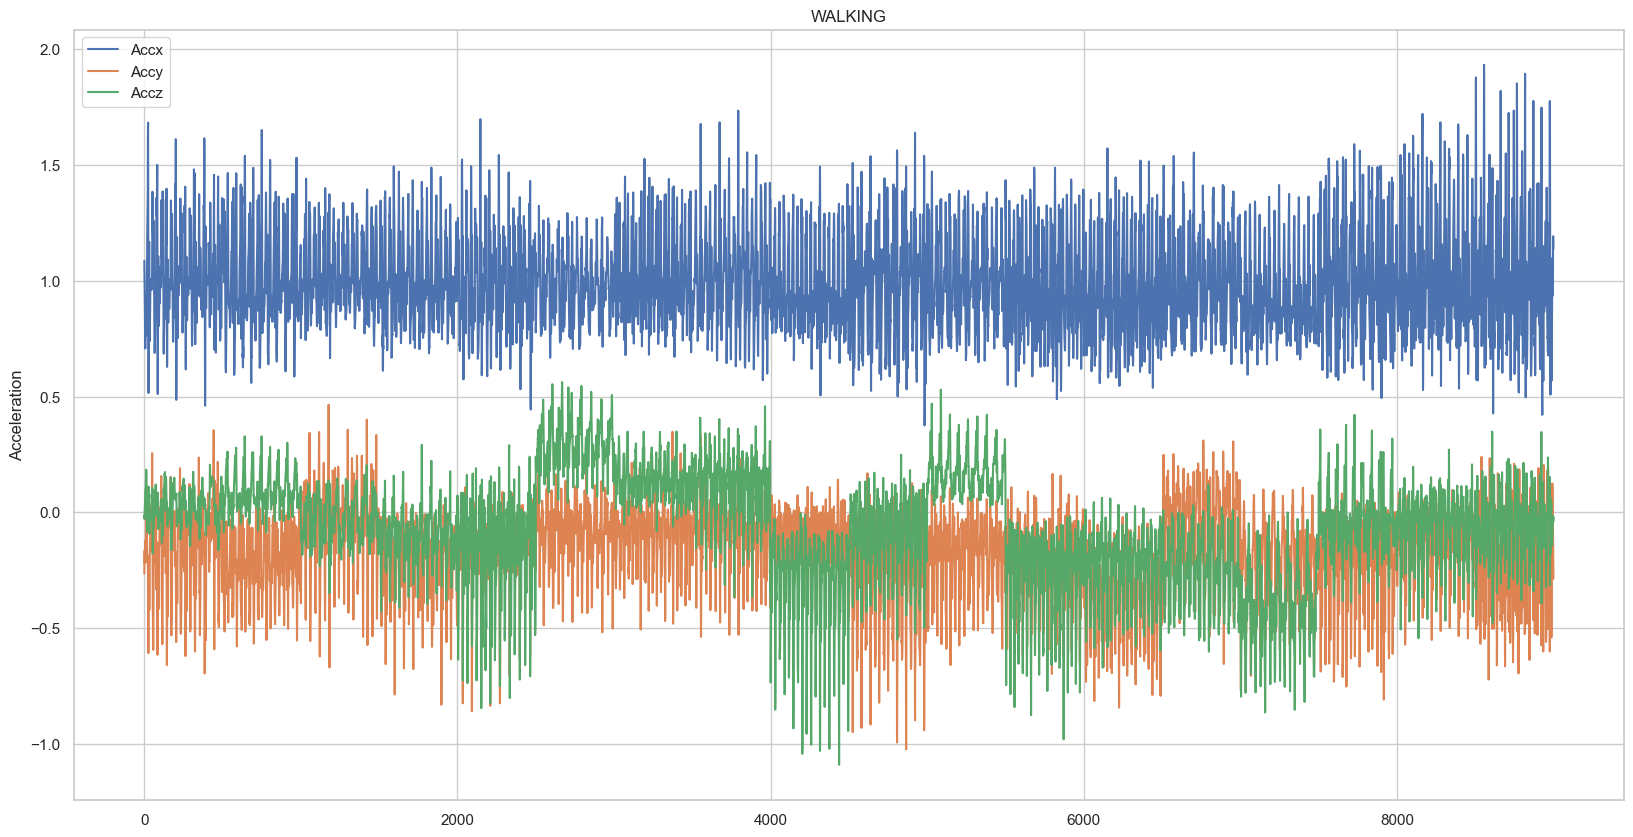

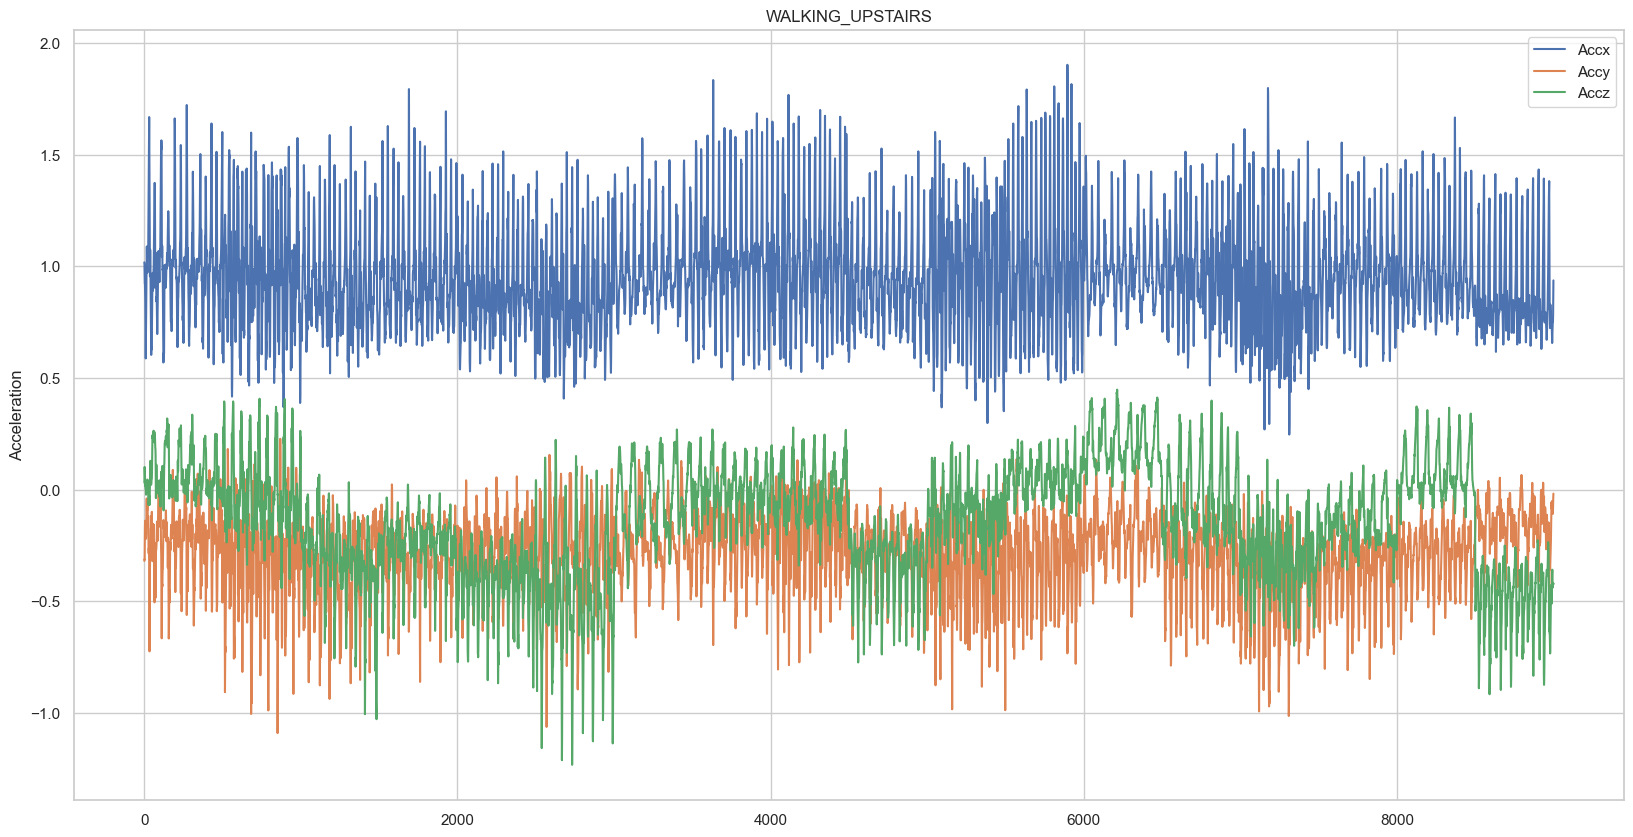

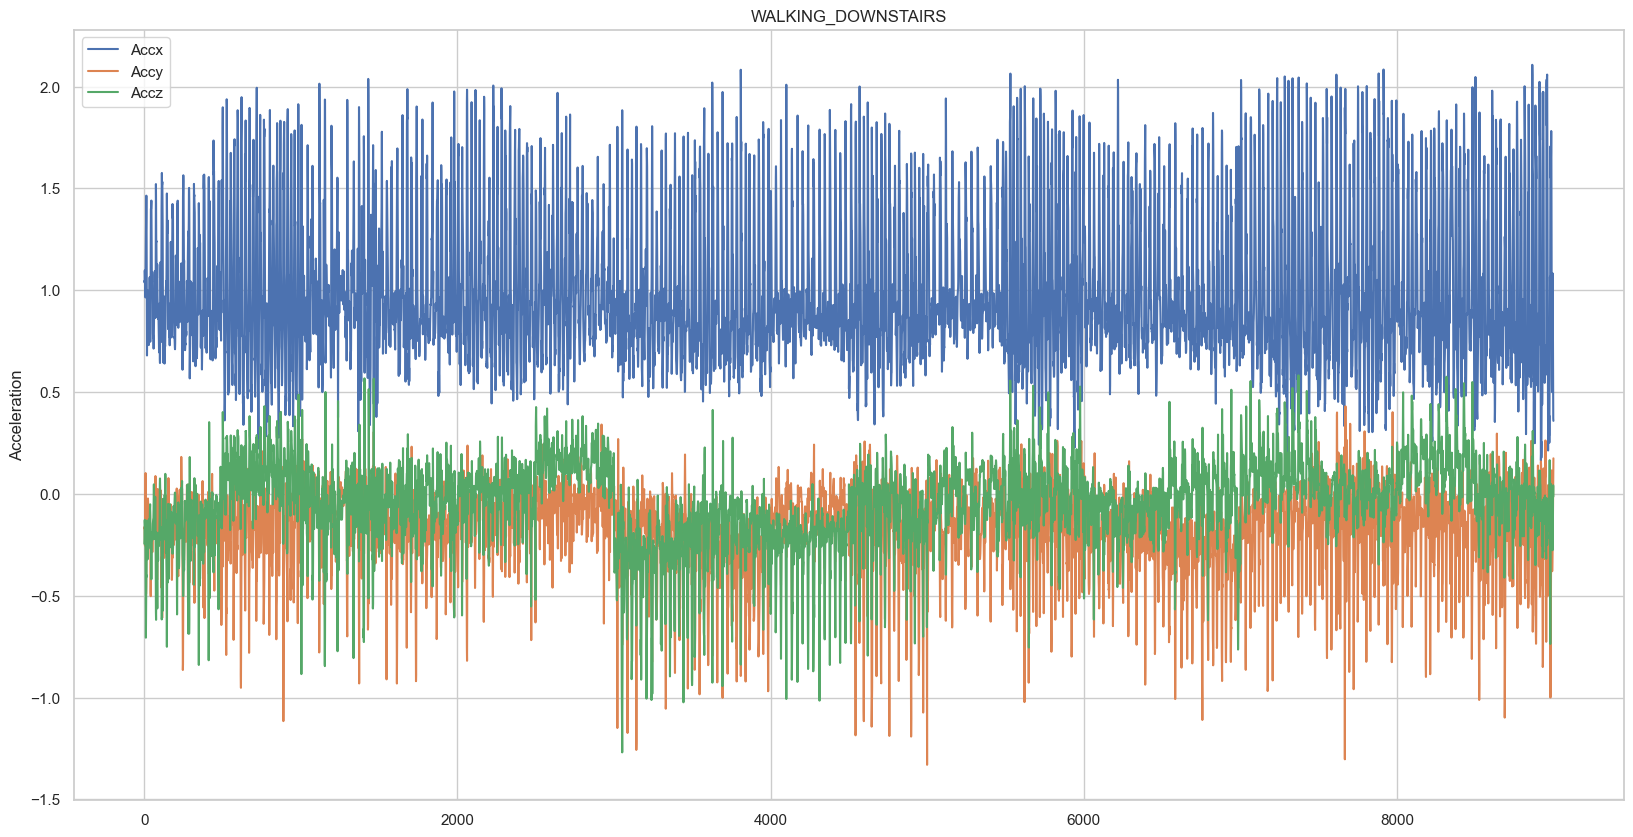

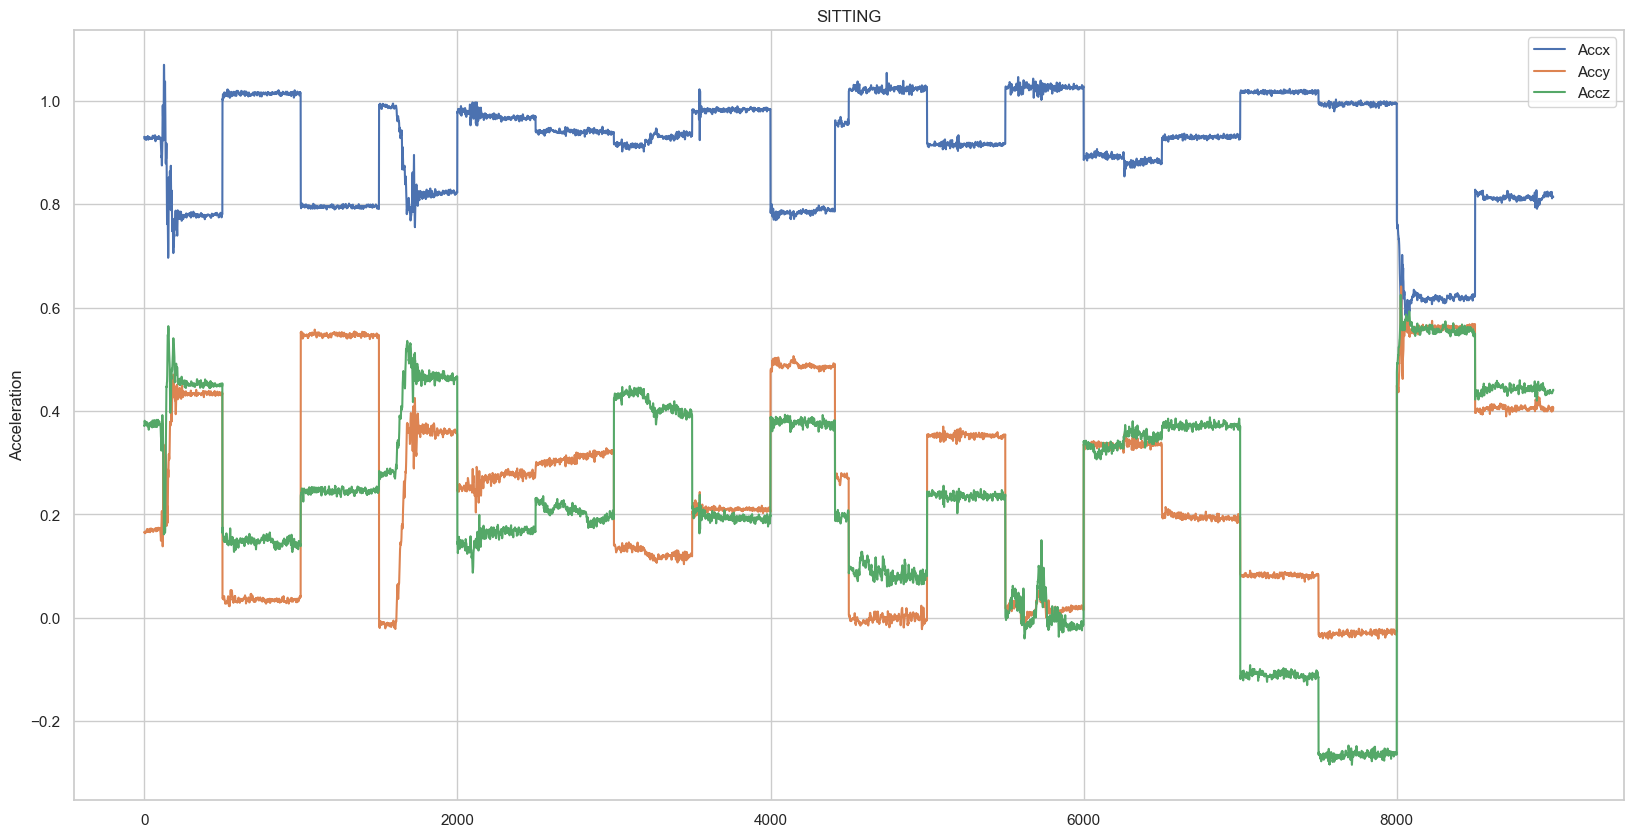

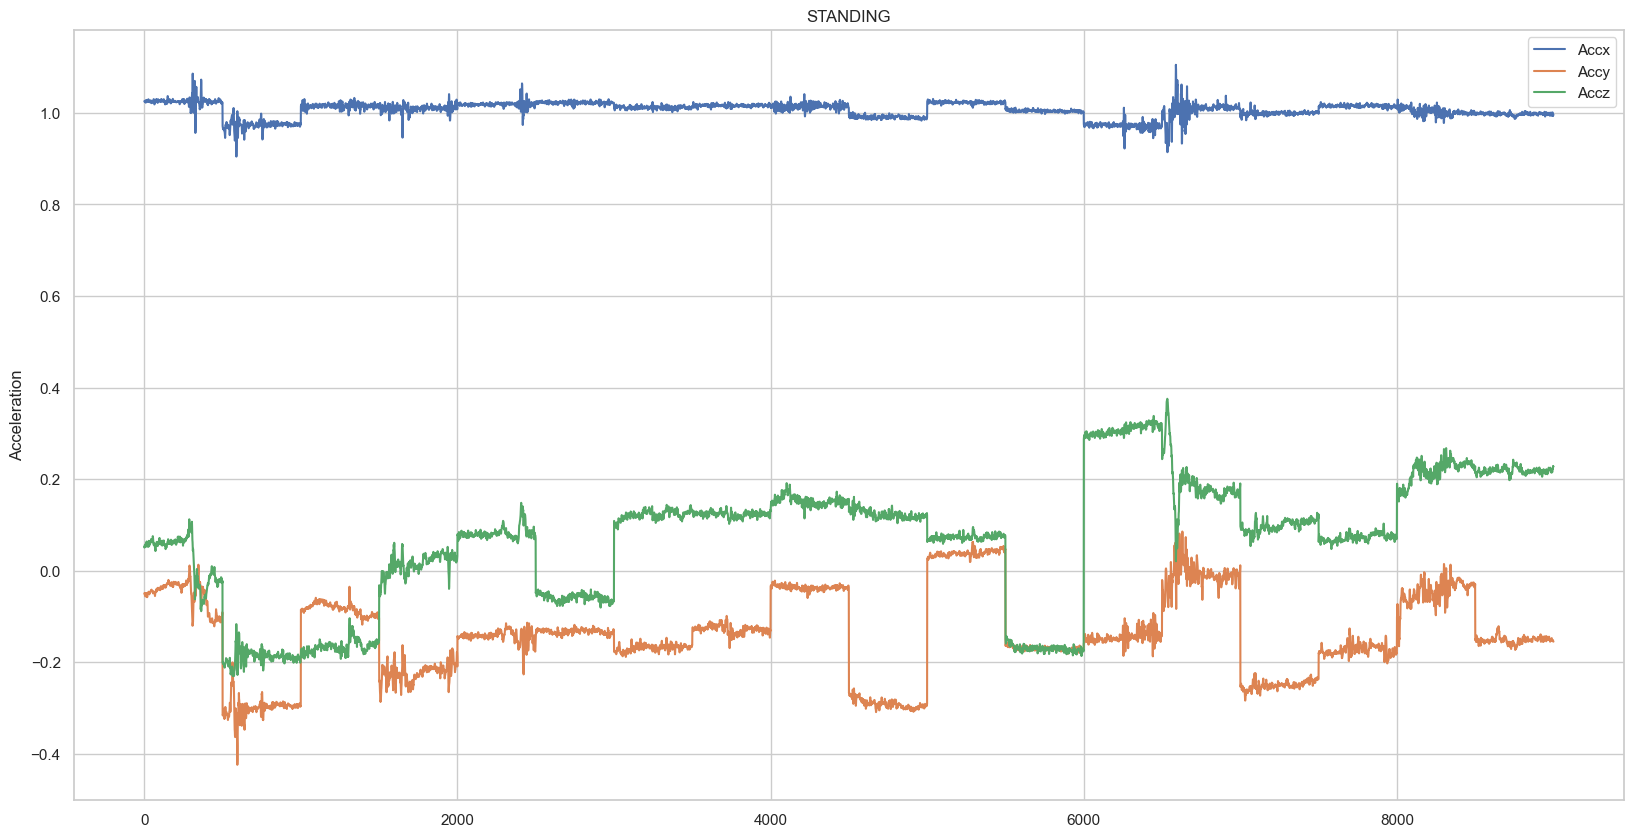

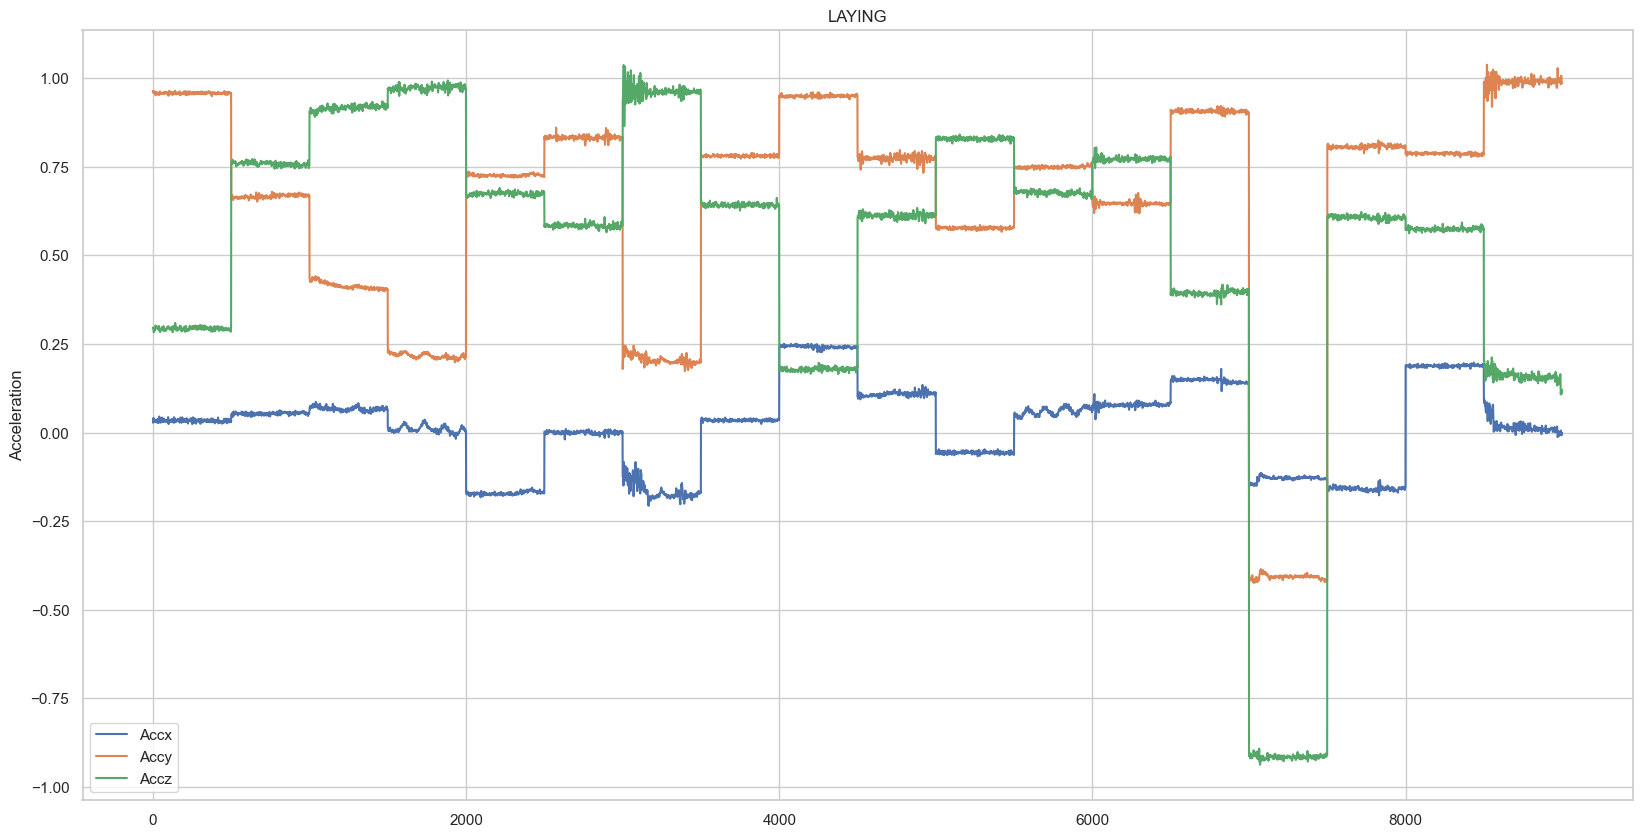

In [45]:
grouped_data = df.groupby("Label")
datasets = []

for i,group in grouped_data:
    dataset = group.reset_index(drop=True)
    datasets.append(dataset)

for i in range(len(datasets)):
    label = datasets[i].iloc[0]['Label']
    activity_name = list(classes.keys())[list(classes.values()).index(label)]
    plt.figure(figsize=(20, 10))
    data_to_plot = datasets[i].drop(columns=['Label'])
    lines = plt.plot(data_to_plot)
    # plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend(lines, data_to_plot.columns)
    plt.title(activity_name)
    plt.show()

Yes, we can observe similarities between activities that involve movement(Dynamic Activities), like walking, walking upstairs, and walking downstairs. Similarly, there are similarities among activities where a person stays in one place, such as lying, standing, and sitting(Static Activities).

The model will be able to differenciate between static and dyanamic activities but it may not be able to classify the activies.

<h3> Question 2</h3>
<p> Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration 
 for each activity and justify your answer. [1 mark]</p>
 

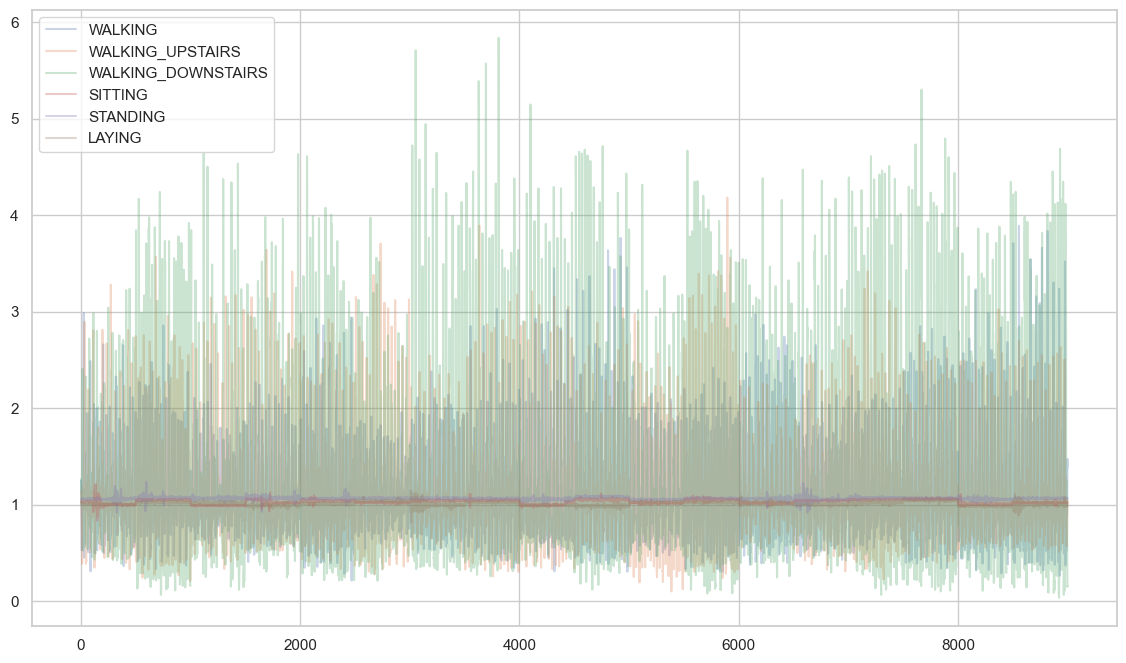

In [46]:
df = df.assign(Total_Acceleration = ((df.Accx)**2)+((df.Accy)**2)+((df.Accz)**2))
df
df['Label'].unique()
Movement = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
plt.figure(figsize=(14,8))
for i in range(1,7):
    length = range(1,len(df[df["Label"]==i])+1)
    plt.plot(length,df[df['Label']==i]["Total_Acceleration"],alpha = 0.3)
    
    plt.legend(Movement)
plt.show()

Yes, we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs). We can observe that linear acceleartion of static activities is close to state of rest, whereas linear acceleration of dynamic activities is far from state of rest.

In [47]:
df

,Accx,Accy,Accz,Label,Total_Acceleration
0,1.025523,-0.049268,0.052081,5.0,1.056837
1,1.024647,-0.050387,0.050609,5.0,1.055002
2,1.024841,-0.050285,0.054577,5.0,1.055806
3,1.025256,-0.049916,0.056422,5.0,1.056825
4,1.025107,-0.053390,0.055209,5.0,1.056743
...,...,...,...,...,...
53995,0.760023,-0.108081,-0.437535,2.0,0.780754
53996,0.752419,-0.099470,-0.426778,2.0,0.758168
53997,0.782669,-0.062308,-0.418945,2.0,0.791968
53998,0.842736,-0.034186,-0.423649,2.0,0.890852


<h3> Question 3 </h3><p>Train Decision Tree using trainset and report Accuracy and confusion matrix using testset. [1 mark]</p>

Accuracy 69.44444444444444


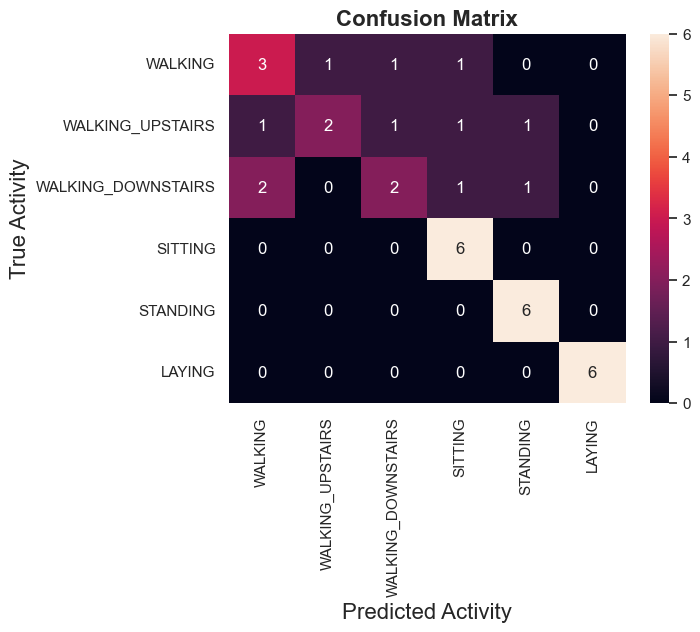

In [48]:
clf = DecisionTreeClassifier(random_state = 500)
clf.fit(X_train.reshape(108,-1),y_train)

y_pred = clf.predict(X_test.reshape(36,-1))
print("Accuracy", metrics.accuracy_score(y_test,y_pred)*100)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
class_labels_list = [key for key, value in sorted(classes.items(), key=lambda item: item[1])]

# Plot the confusion matrix with customized labels
sns.heatmap(confusion_matrix, annot=True, xticklabels=class_labels_list, yticklabels=class_labels_list)

# Add labels and title
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Show the plot
plt.show()

<h3> Question 4</h3> <p>Train Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained. [1 mark]</p> 

Accuracy : 50.0


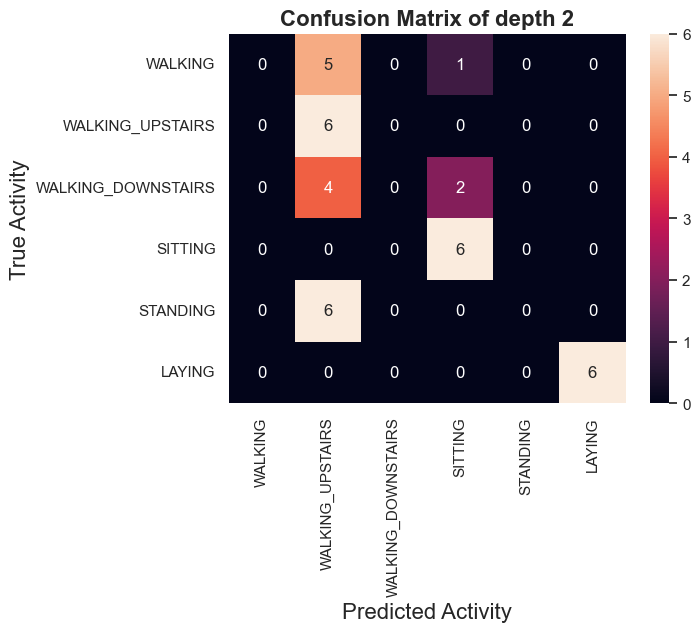

Accuracy : 50.0


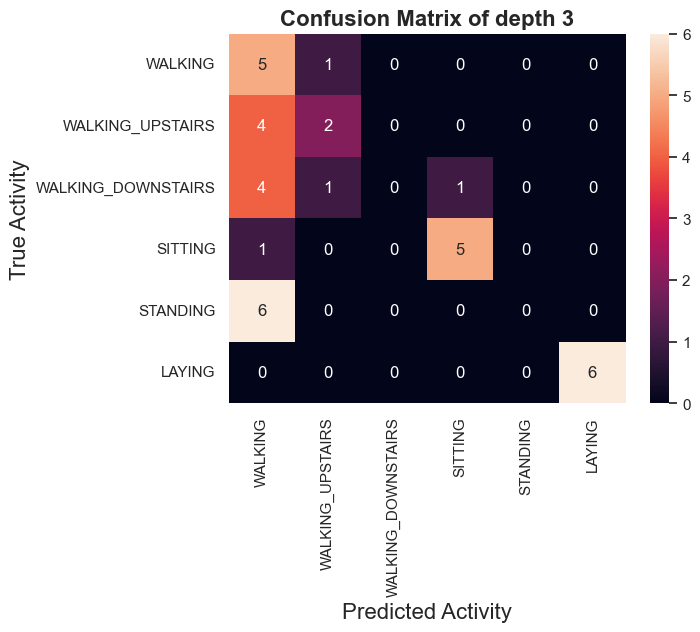

Accuracy : 63.888888888888886


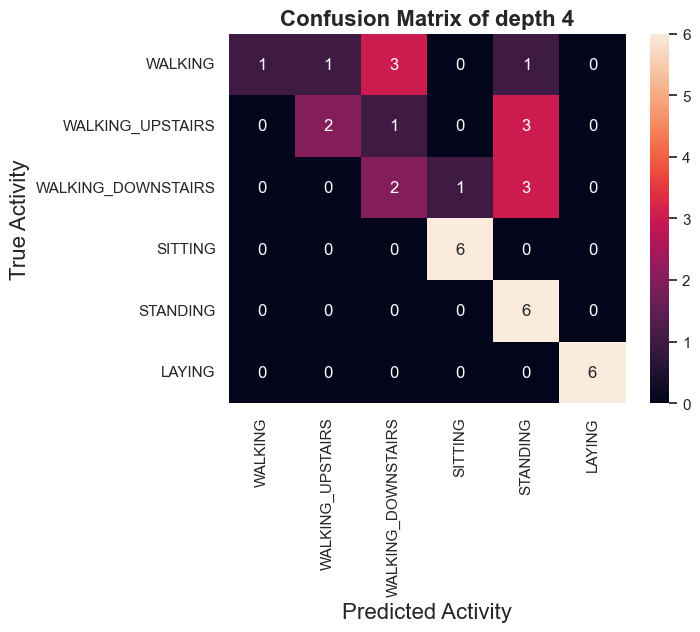

Accuracy : 61.111111111111114


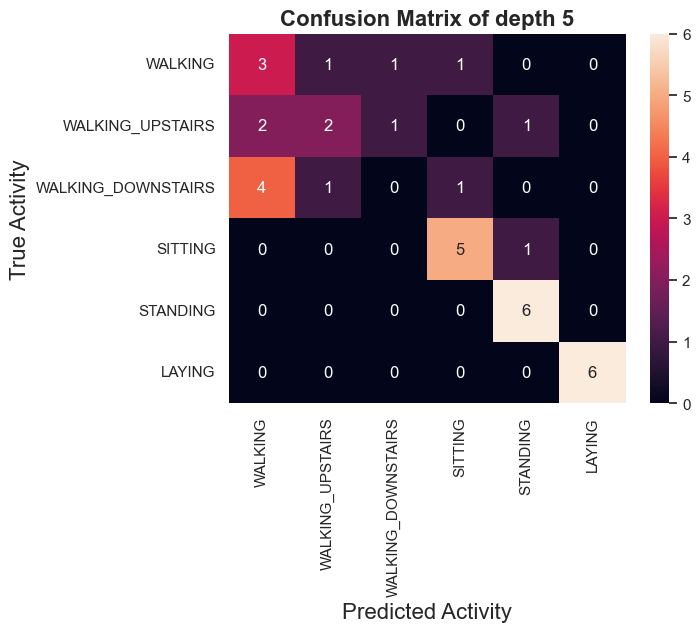

Accuracy : 69.44444444444444


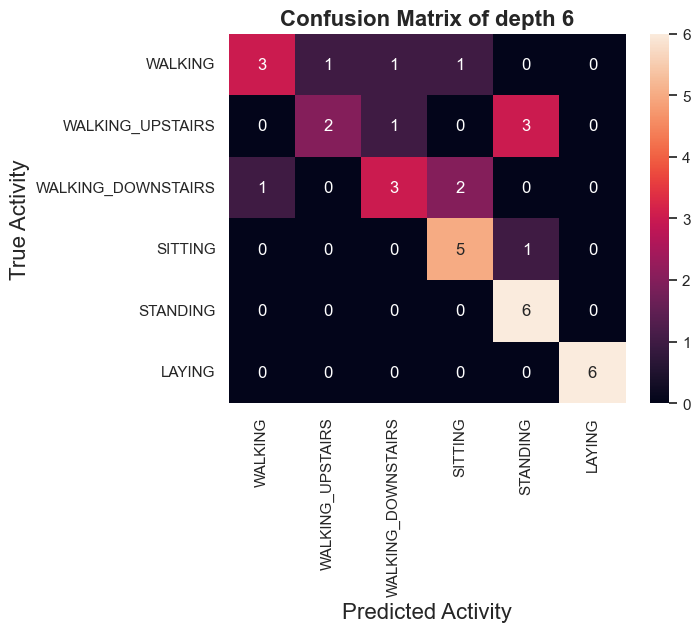

Accuracy : 69.44444444444444


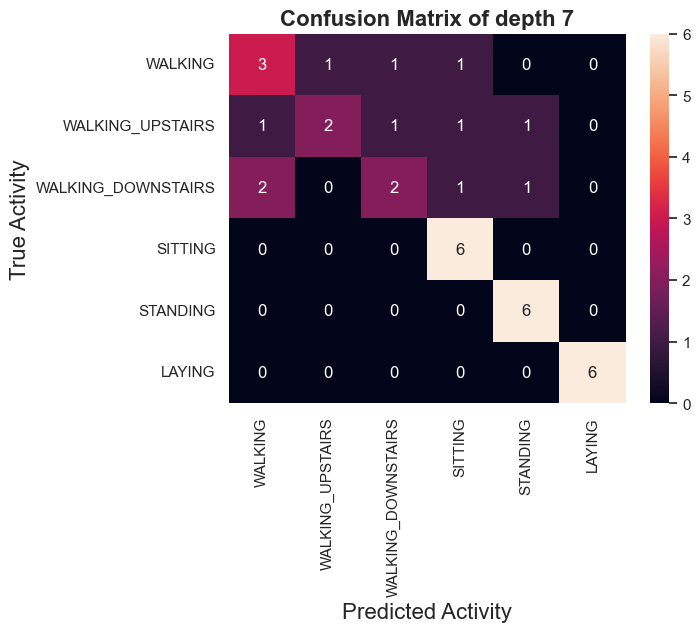

Accuracy : 69.44444444444444


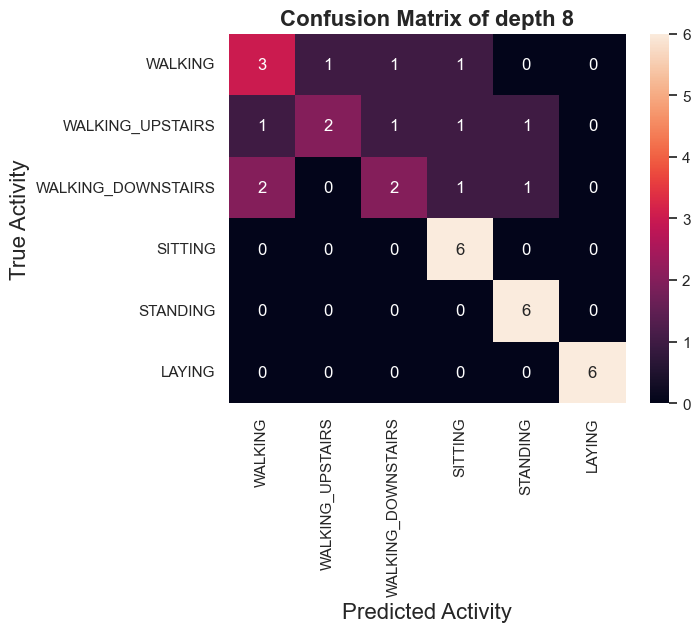

[50.0, 50.0, 63.888888888888886, 61.111111111111114, 69.44444444444444, 69.44444444444444, 69.44444444444444]


In [49]:
accuracy1 = []
for i in range(2,9):
    clf = DecisionTreeClassifier(max_depth = i, random_state = 500)
    clf.fit(X_train.reshape(108,-1),y_train)
    y_pred = clf.predict(X_test.reshape(36,-1))
    accuracy =  metrics.accuracy_score(y_test,y_pred)*100
    accuracy1.append(accuracy)
    print(f"Accuracy : {accuracy}")
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_labels_list = [key for key, value in sorted(classes.items(), key=lambda item: item[1])]

    # Plot the confusion matrix with customized labels
    sns.heatmap(confusion_matrix, annot=True, xticklabels=class_labels_list, yticklabels=class_labels_list)

    # Add labels and title
    plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
    plt.ylabel("True Activity", fontdict={'fontsize': 16})
    plt.title(f"Confusion Matrix of depth {i}", fontdict={'fontsize': 16, 'fontweight': 'bold'})

    # Show the plot
    plt.show()
print(accuracy1)

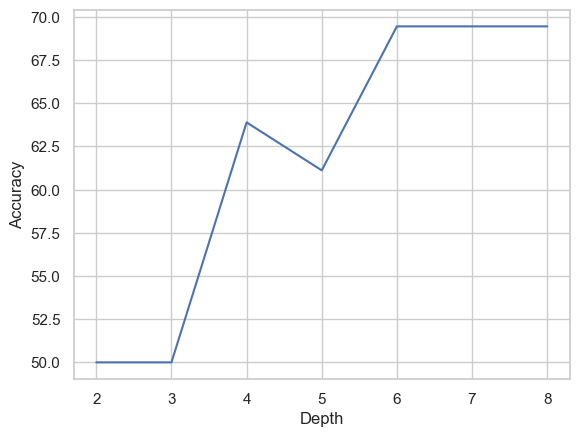

In [50]:
depth = range(2,9)
plt.plot(depth, accuracy1)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

As decision tree depth increases, the model fits training data more closely, capturing intricate patterns that may lead to overfitting. While training accuracy may rise, the trend in test accuracy may differ, revealing the trade-off between model complexity and generalization. Analyzing accuracy vs. depth and confusion matrices helps assess overfitting, especially if test accuracy decreases after a certain depth.

<h3>Question 5</h3>
<p> Use PCA (Principal Component Analysis) on Total Acceleration $(acc_x^2+acc_y^2+acc_z^2)$ to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. Next, use [TSFEL] [a featurizer library] to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference? **[2 marks]**</p>




         PCA1      PCA2  Label
0   -1.026822  2.752482      1
1   -1.942665 -3.810702      1
2    0.300370 -0.364863      1
3    1.107598 -3.969612      1
4   -3.280294  0.333028      1
..        ...       ...    ...
103 -0.260404 -0.048106      6
104  0.201351  0.030702      6
105  0.762710  0.054491      6
106 -0.573232 -0.095806      6
107 -0.096067 -0.325491      6

[108 rows x 3 columns]


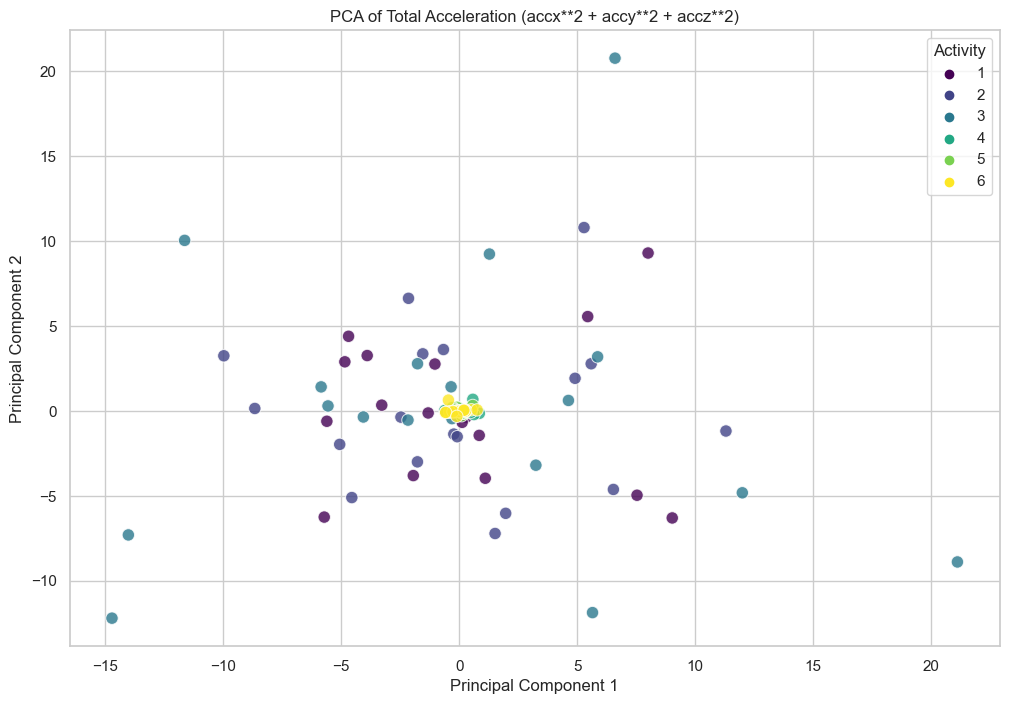

In [51]:
from sklearn.decomposition import PCA

pca_dataframe = pd.DataFrame()
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

for label in tuple(classes.values()):
    subset = df[df["Label"]==label]['Total_Acceleration'].values.reshape(-1,500)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(subset)
    pca_df = pd.DataFrame(data = pca_result,columns=["PCA1","PCA2"])
    pca_df["Label"] = label
    pca_dataframe = pd.concat([pca_dataframe,pca_df],ignore_index=True)

print(pca_dataframe)
sns.set(style="whitegrid")

# Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Label', data=pca_dataframe, palette='viridis', s=80, alpha=0.8)

# Set plot title and labels
plt.title('PCA of Total Acceleration (accx**2 + accy**2 + accz**2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display legend
plt.legend(title='Activity', loc='upper right')

# Show the plot
plt.show()

In [52]:
import tsfel
cfg_file = tsfel.get_features_by_domain()                                                       
tsfel_data = tsfel.time_series_features_extractor(cfg_file, df[['Accx', "Accy", "Accz"]],window_size=500)

*** Feature extraction started ***


/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_63802/1892293095.py:3: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_data = tsfel.time_series_features_extractor(cfg_file, df[['Accx', "Accy", "Accz"]],window_size=500)



*** Feature extraction finished ***


In [53]:
tsfel_data

,Accx_Absolute energy,Accx_Area under the curve,Accx_Autocorrelation,Accx_Average power,Accx_Centroid,Accx_ECDF Percentile Count_0,Accx_ECDF Percentile Count_1,Accx_ECDF Percentile_0,Accx_ECDF Percentile_1,Accx_ECDF_0,...,Accz_Wavelet variance_0,Accz_Wavelet variance_1,Accz_Wavelet variance_2,Accz_Wavelet variance_3,Accz_Wavelet variance_4,Accz_Wavelet variance_5,Accz_Wavelet variance_6,Accz_Wavelet variance_7,Accz_Wavelet variance_8,Accz_Zero crossing rate
0,525.729129,5.116566,525.729129,105.356539,2.494808,100.0,400.0,1.022830,1.028170,0.002,...,0.000024,0.000103,0.000189,0.000311,0.000487,0.000739,0.001079,0.001509,0.002015,7.0
1,473.388932,4.855136,473.388932,94.867521,2.500603,100.0,400.0,0.969650,0.977597,0.002,...,0.000095,0.000429,0.000952,0.001577,0.002216,0.002817,0.003415,0.004098,0.004919,0.0
2,527.866197,5.002506,527.866197,105.784809,2.520863,100.0,400.0,0.826546,1.130707,0.002,...,0.001330,0.004920,0.008734,0.013286,0.019779,0.029384,0.042897,0.059884,0.079087,63.0
3,536.884333,5.011056,536.884333,107.592051,2.527137,100.0,400.0,0.777518,1.235884,0.002,...,0.014940,0.049996,0.058125,0.076599,0.107367,0.143353,0.176186,0.196150,0.198247,30.0
4,0.559819,0.166036,0.559819,0.112188,2.438871,100.0,400.0,0.030462,0.036120,0.002,...,0.000145,0.000491,0.001036,0.001748,0.002639,0.003745,0.005075,0.006612,0.008344,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,604.315970,4.965866,604.315970,121.105405,2.518257,100.0,400.0,0.601997,1.546456,0.002,...,0.008654,0.034316,0.045905,0.047902,0.049050,0.054841,0.064337,0.075486,0.086735,77.0
104,536.243537,4.966333,536.243537,107.463635,2.466149,100.0,400.0,0.737776,1.244163,0.002,...,0.013703,0.028288,0.036440,0.054722,0.076143,0.091170,0.094933,0.089094,0.079421,89.0
105,497.583869,4.977928,497.583869,99.716206,2.494573,100.0,400.0,0.995376,0.999803,0.002,...,0.000086,0.000307,0.000637,0.001058,0.001562,0.002161,0.002890,0.003779,0.004826,0.0
106,497.627808,4.875026,497.627808,99.725012,2.488857,100.0,400.0,0.799938,1.133543,0.002,...,0.000571,0.002751,0.007735,0.016853,0.031005,0.050724,0.075263,0.103755,0.135848,27.0


             PCA1          PCA2
0    14708.035567 -33923.435242
1    14795.228882 -17218.135476
2   -30192.589476  -1994.339203
3   -40027.037436  10721.984653
4    67823.769810  22322.456438
..            ...           ...
103 -73377.273679  12877.549355
104 -31318.466280   3176.934096
105  17310.342875 -26784.344842
106 -23525.394109  -3097.582155
107 -16337.744014  10590.787608

[108 rows x 2 columns]


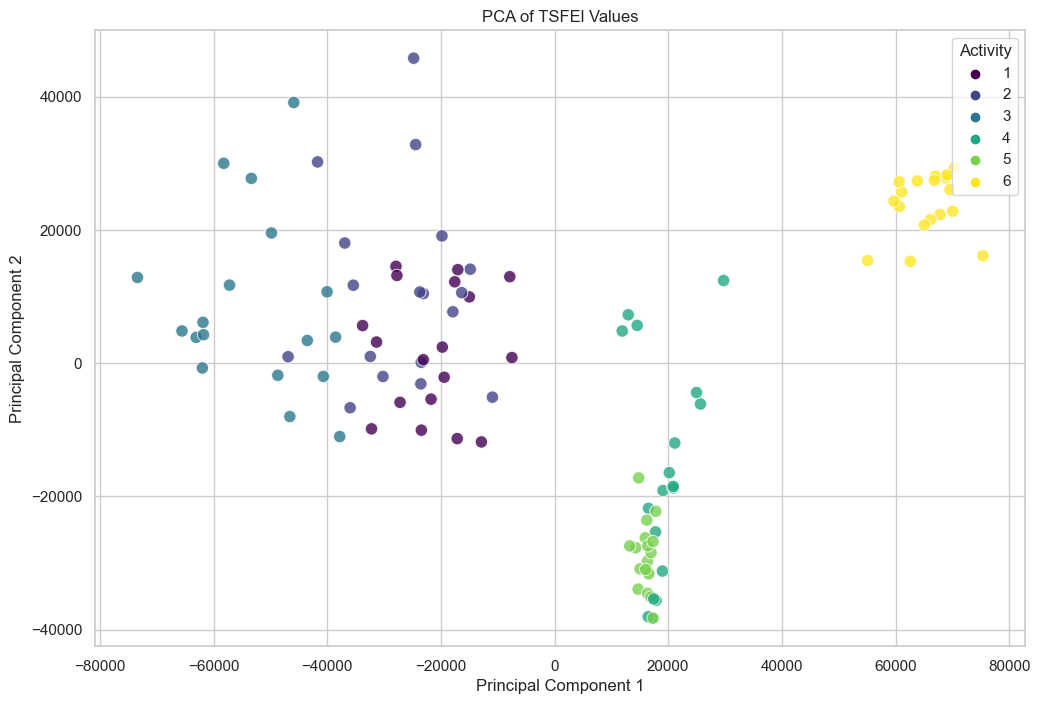

In [65]:
pca_tsfel = PCA(n_components=2)
pca_tsfel_result = pca_tsfel.fit_transform(tsfel_data.values)
pca_tsfel_df = pd.DataFrame(data = pca_tsfel_result,columns=["PCA1","PCA2"])
print(pca_tsfel_df)
pca_tsfel_df["Label"] = y_train
# print(pca_tsfel_df)
# print(train_x)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2',hue = 'Label',data=pca_tsfel_df,palette='viridis', s=80, alpha=0.8)

plt.title('PCA of TSFEl Values')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(title='Activity', loc='upper right')

plt.show()

In [55]:
pca_tsfel_df

,PCA1,PCA2,Label
0,14708.035567,-33923.435242,5
1,14795.228882,-17218.135476,5
2,-30192.589476,-1994.339203,2
3,-40027.037436,10721.984653,3
4,67823.769810,22322.456438,6
...,...,...,...
103,-73377.273679,12877.549355,3
104,-31318.466280,3176.934096,1
105,17310.342875,-26784.344842,5
106,-23525.394109,-3097.582155,2


<h3>Question 6</h3><p> Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set. Does featurizing works better than using the raw data? Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question. [2 marks]</p>

In [56]:
import tsfel
test_df = pd.DataFrame(X_test.reshape((-1, 3)), columns = ["Accx", "Accy", "Accz"])
test_df
cfg_file_ = tsfel.get_features_by_domain()                                                       
tsfel_test_data = tsfel.time_series_features_extractor(cfg_file_, test_df[['Accx', "Accy", "Accz"]],window_size=500)

*** Feature extraction started ***


/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_63802/2104483625.py:5: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_test_data = tsfel.time_series_features_extractor(cfg_file_, test_df[['Accx', "Accy", "Accz"]],window_size=500)



*** Feature extraction finished ***


In [57]:
tsfel_test_data

,Accx_Absolute energy,Accx_Area under the curve,Accx_Autocorrelation,Accx_Average power,Accx_Centroid,Accx_ECDF Percentile Count_0,Accx_ECDF Percentile Count_1,Accx_ECDF Percentile_0,Accx_ECDF Percentile_1,Accx_ECDF_0,...,Accz_Wavelet variance_0,Accz_Wavelet variance_1,Accz_Wavelet variance_2,Accz_Wavelet variance_3,Accz_Wavelet variance_4,Accz_Wavelet variance_5,Accz_Wavelet variance_6,Accz_Wavelet variance_7,Accz_Wavelet variance_8,Accz_Zero crossing rate
0,543.448555,4.911136,543.448555,108.907526,2.530518,100.0,400.0,0.704972,1.349636,0.002,...,0.014180,0.056817,0.088464,0.123827,0.160901,0.197897,0.220013,0.215158,0.187089,2.0
1,564.316799,5.066863,564.316799,113.089539,2.493344,100.0,400.0,0.762332,1.263972,0.002,...,0.008211,0.035662,0.055457,0.060580,0.057025,0.054403,0.054424,0.053299,0.049809,80.0
2,4.599656,0.473919,4.599656,0.921775,2.377294,100.0,400.0,0.084352,0.106024,0.002,...,0.001075,0.003771,0.007768,0.013521,0.021394,0.030968,0.041766,0.053520,0.066160,0.0
3,518.508959,5.011804,518.508959,103.909611,2.500084,100.0,400.0,0.864744,1.135421,0.002,...,0.002181,0.009849,0.022818,0.042444,0.067042,0.093780,0.116429,0.128106,0.126750,16.0
4,0.402825,0.139735,0.402825,0.080726,2.407439,100.0,400.0,0.023828,0.031959,0.002,...,0.000311,0.001137,0.002456,0.004284,0.006599,0.009371,0.012577,0.016188,0.020189,0.0
5,524.544546,5.111009,524.544546,105.119147,2.493676,100.0,400.0,1.022170,1.025731,0.002,...,0.000031,0.000092,0.000159,0.000231,0.000297,0.000361,0.000437,0.000529,0.000630,0.0
6,30.309780,1.228203,30.309780,6.074104,2.485918,100.0,400.0,0.241142,0.251094,0.002,...,0.001168,0.004191,0.009119,0.015884,0.024501,0.034976,0.047306,0.061446,0.077318,0.0
7,497.739114,4.877595,497.739114,99.747317,2.472182,100.0,400.0,0.784800,1.202131,0.002,...,0.009342,0.034796,0.057884,0.100034,0.153607,0.202996,0.225477,0.211677,0.172606,10.0
8,518.975585,4.985627,518.975585,104.003123,2.518534,100.0,400.0,0.843795,1.169568,0.002,...,0.006411,0.024609,0.027381,0.033792,0.046100,0.059068,0.068889,0.074439,0.076826,31.0
9,548.931264,4.993505,548.931264,110.006265,2.478714,100.0,400.0,0.763000,1.301329,0.002,...,0.016778,0.067038,0.067547,0.057224,0.056328,0.061700,0.069293,0.075342,0.078215,62.0


Accuracy : 91.66666666666666


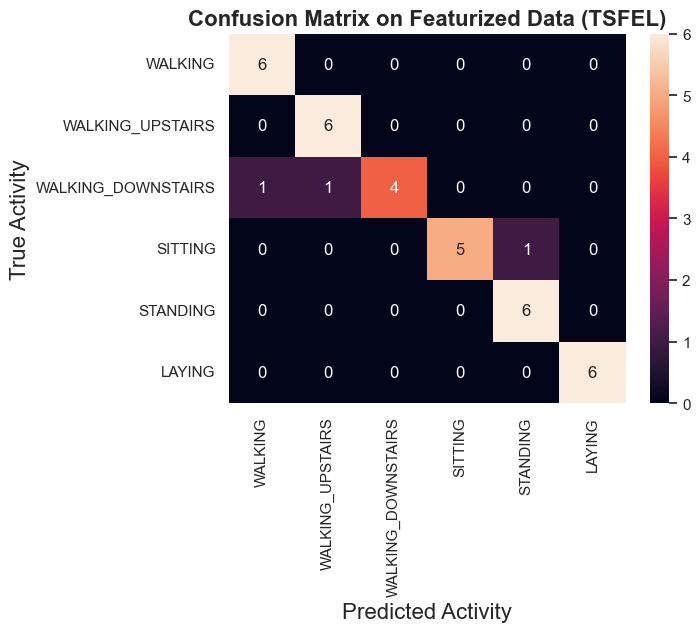

In [58]:
clf1 = DecisionTreeClassifier(random_state=123)
clf1.fit(tsfel_data.values, y_train)
y_pred = clf1.predict(tsfel_test_data.values)
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print(f'Accuracy : {accuracy}')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

class_labels_list = [key for key, value in sorted(classes.items(), key=lambda item: item[1])]

# Plot the confusion matrix with customized labels
sns.heatmap(confusion_matrix, annot=True, xticklabels=class_labels_list, yticklabels=class_labels_list)

# Add labels and title
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix on Featurized Data (TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Show the plot
plt.show()

Accuracy : 50.0


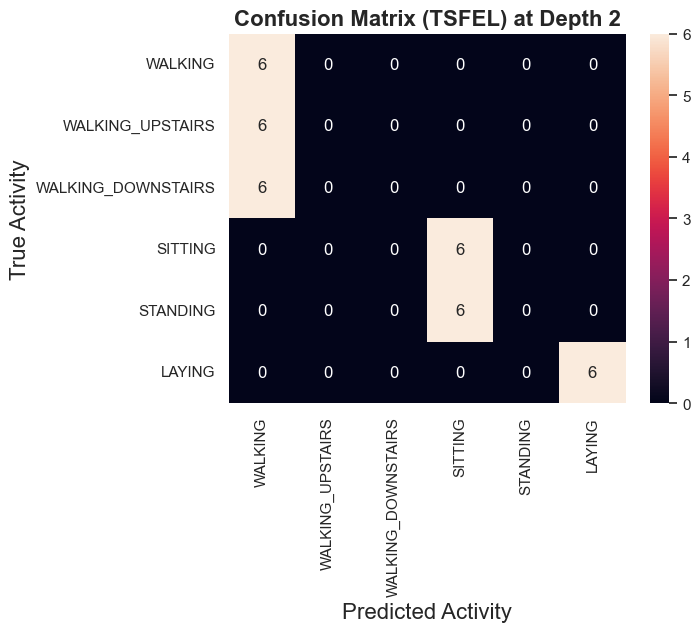

Accuracy : 72.22222222222221


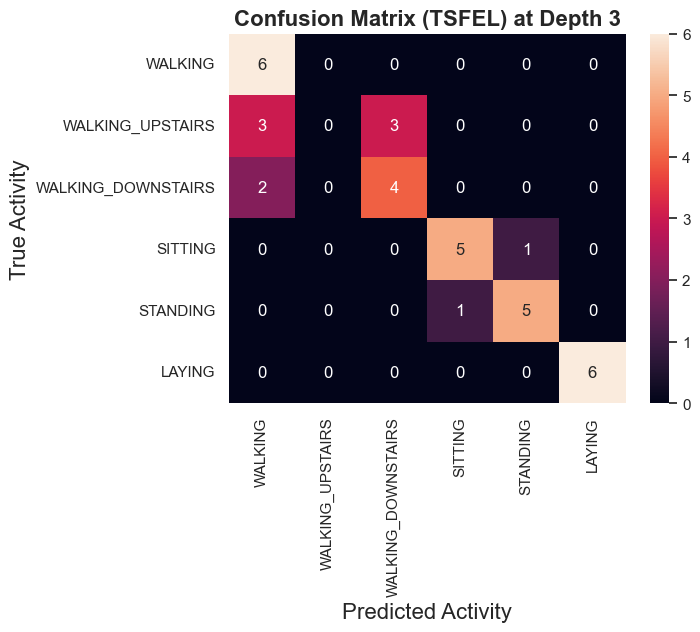

Accuracy : 91.66666666666666


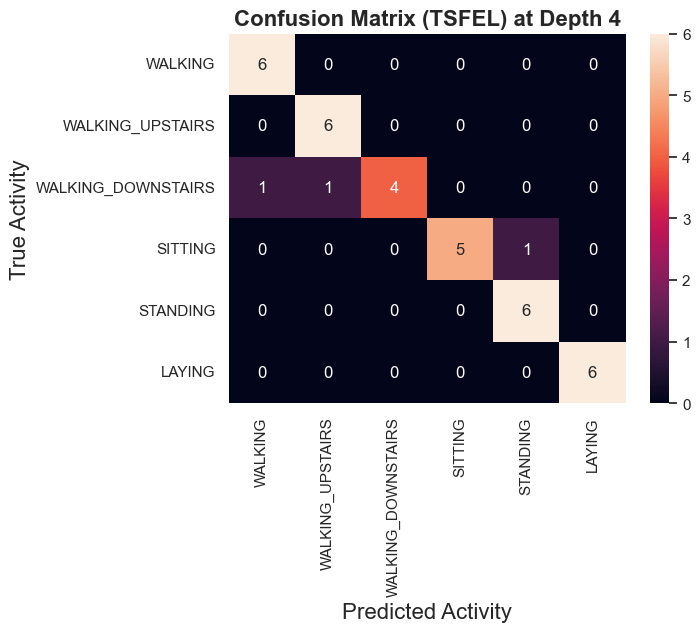

Accuracy : 91.66666666666666


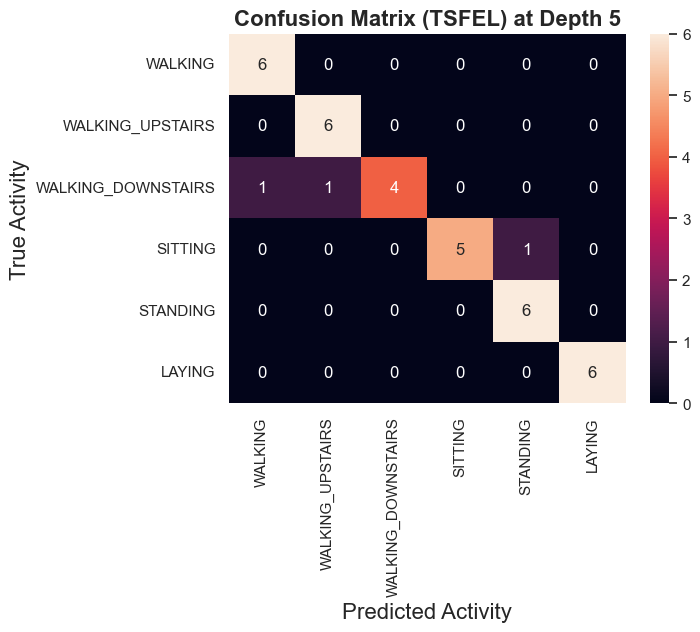

Accuracy : 91.66666666666666


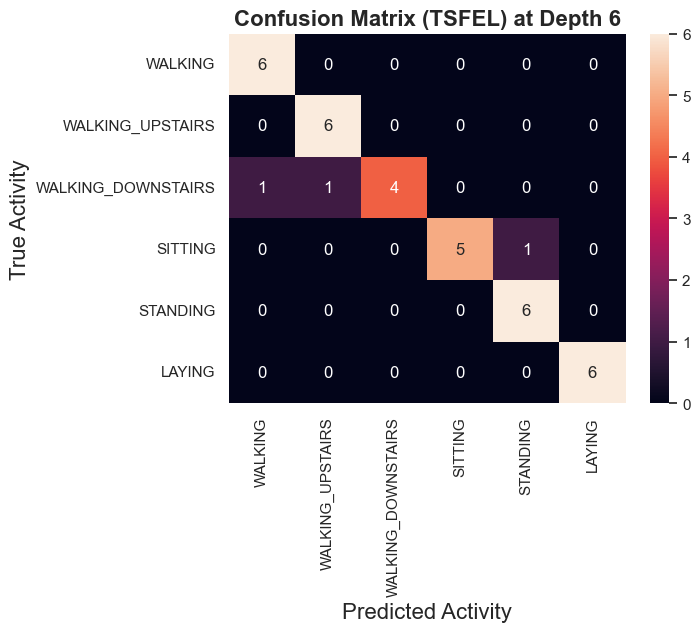

Accuracy : 91.66666666666666


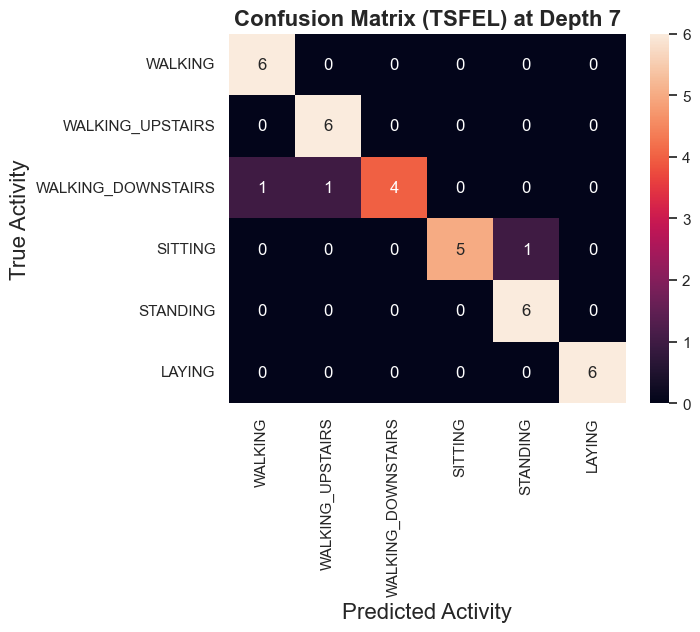

Accuracy : 91.66666666666666


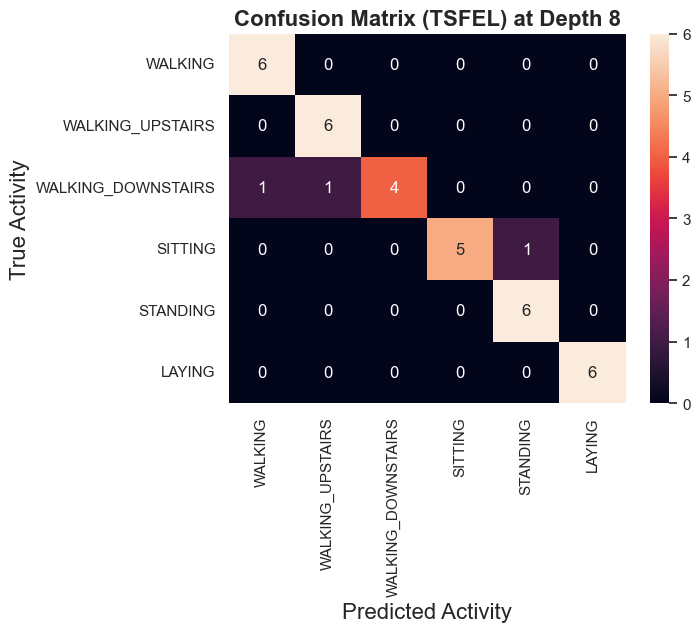

In [59]:
tsfel_data
accuracy2 = []
for i in range(2,9):
    clf1 = DecisionTreeClassifier(max_depth=i,random_state=123)
    clf1.fit(tsfel_data.values, y_train)
    y_pred = clf1.predict(tsfel_test_data.values)
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    accuracy2.append(accuracy)
    print(f'Accuracy : {accuracy}')
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_labels_list = [key for key, value in sorted(classes.items(), key=lambda item: item[1])]

# Plot the confusion matrix with customized labels
    sns.heatmap(confusion_matrix, annot=True, xticklabels=class_labels_list, yticklabels=class_labels_list)

# Add labels and title
    plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
    plt.ylabel("True Activity", fontdict={'fontsize': 16})
    plt.title(f"Confusion Matrix (TSFEL) at Depth {i}", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Show the plot
    plt.show()
# print(accuracy1)
# print(accuracy2)

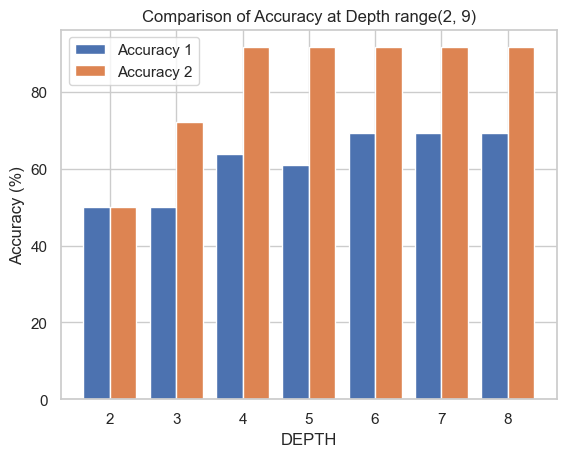

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Set the depth value
depth_range = range(2,9) 

# Set up positions for the bars
positions = np.arange(len(depth_range))

# Plot the bars
plt.bar(positions - 0.2, accuracy1, width=0.4, label='Accuracy 1')
plt.bar(positions + 0.2, accuracy2, width=0.4, label='Accuracy 2')

# Add labels and title
plt.xlabel('DEPTH')
plt.ylabel('Accuracy (%)')
plt.title(f'Comparison of Accuracy at Depth {depth_range}')
plt.xticks(positions, [depth for depth in depth_range])

# Add legend
plt.legend()

# Show the plot
plt.show()


Yes, Featurizing data works better.


<h3> Question 7</h3> <p>Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? [1 mark]</p>

Model performances according to different depths
1) At decision tree of depth 2, the model is able to differentiate between static activities and dynamic activities, but it is not able to diffferentitate between various activities categorised under these two categories. This means it is not able to differentiate between laying, sitting, standing among static activities and between walking, walking upstairs, walking downstairs among dynamic activities.

2) At decision tree of depth 3, the model performance is bad for walking upstairs, walking downstairs and little bad for sitting and standing.

3) At decisionn tree of 4,5,6,7,8, the model performance is little bad for walking downstairs and sitting.

The reason behind this is that the linear acceleration of body is relatively similar when we are walking upstairs or downstairs, similarly while sitting and standing.

In [61]:
# To identify whether there are any participants/activities where the model performance is bad, we can analyze the confusion matrix 
# obtained during the evaluation of the Decision Tree model. The confusion matrix provides information about the true positive, 
# true negative, false positive, and false negative predictions for each class.
#If there are classes with lower accuracy or more misclassifications, it indicates areas where the model performs poorly. 


<h1>Deployment</h1>

     Accx    Accy    Accz  Label
0 -0.1396  0.7724  0.1996      1
1 -0.1459  0.7900  0.2001      1
2 -0.1171  0.8271  0.1845      1
3 -0.1076  0.8662  0.1825      1
4 -0.1112  0.9185  0.1908      1
(3000, 4)
[1, 2, 5, 4, 3, 6]
(6,)
[6 6 6 6 6 6]


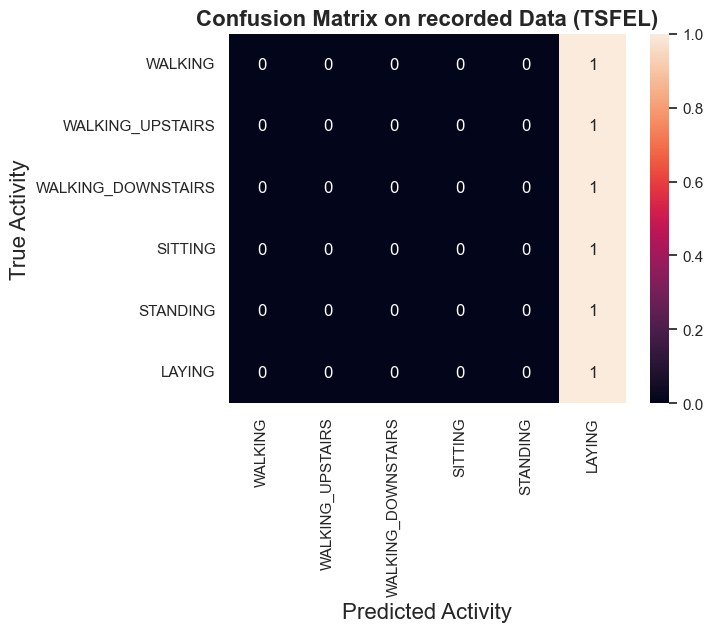

In [62]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import tsfel

# Set your path to the dataset
deployment_dir = "./Combined/Deployment"

# Define class labels for activities
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

# Initialize empty DataFrame and activity list
recorded_df = pd.DataFrame()
recorded_activities = []

# Iterate through the activity folders
for activity_folder in os.listdir(deployment_dir):
    activity_path = os.path.join(deployment_dir, activity_folder)

    # Check if the item in the directory is a subdirectory
    if os.path.isdir(activity_path):
        # Iterate through the files in each activity folder
        for filename in os.listdir(activity_path):
            # Read the CSV file with specified encoding (change 'latin1' if needed)
            df = pd.read_csv(os.path.join(activity_path, filename), encoding='latin1')

            # Print the columns to diagnose the issue
            # print(f"Columns in {filename}: {df.columns}")

            # Select only the required columns and rows
            df = df.iloc[:500, :3]

            # Check if the DataFrame is not empty
            if not df.empty:
                # Create a new DataFrame with the desired columns
                df_new = pd.DataFrame(data=df.values, columns=["Accx", "Accy", "Accz"])

                # Extract activity from folder name
                activity_label = classes[activity_folder]

                # Add the activity as a new column "Label" to the DataFrame
                df_new["Label"] = activity_label
                # print("Hi")
                # Append data and activity to the respective variables
                recorded_df = pd.concat([recorded_df, df_new], ignore_index=True)
                recorded_activities.append(activity_label)


# Display the DataFrame and activity list
print(recorded_df.head())
print(recorded_df.shape)
print(recorded_activities)

# The rest of your code remains unchanged


# Training data (modify as needed)
# X_train, y_train = ...

# Use the DecisionTreeClassifier without featurization
model = DecisionTreeClassifier(random_state=360)
model.fit(X_train.reshape(-1, 500 * 3), y_train)
y_pred = model.predict(recorded_df[['Accx', 'Accy', 'Accz']].values.reshape(-1, 500 * 3))
print(y_pred.shape)
print(y_pred)
# Evaluate and plot confusion matrix
accuracy = accuracy_score(recorded_activities, y_pred)
conf_matrix = confusion_matrix(recorded_activities, y_pred)

class_labels_list = [key for key, value in sorted(classes.items(), key=lambda item: item[1])]

# Plot the confusion matrix with customized labels
sns.heatmap(conf_matrix, annot=True, xticklabels=class_labels_list, yticklabels=class_labels_list)

# Add labels and title
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix on recorded Data (TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Show the plot
plt.show()


In [63]:
# Use TSFEL for feature extraction
cfg_file = tsfel.get_features_by_domain()
tsfel_recorded_df = tsfel.time_series_features_extractor(cfg_file, recorded_df[['Accx', 'Accy', 'Accz']], fs=50, window_size=500)
tsfel_recorded_df

*** Feature extraction started ***



*** Feature extraction finished ***


,Accx_Absolute energy,Accx_Area under the curve,Accx_Autocorrelation,Accx_Average power,Accx_Centroid,Accx_ECDF Percentile Count_0,Accx_ECDF Percentile Count_1,Accx_ECDF Percentile_0,Accx_ECDF Percentile_1,Accx_ECDF_0,...,Accz_Wavelet variance_0,Accz_Wavelet variance_1,Accz_Wavelet variance_2,Accz_Wavelet variance_3,Accz_Wavelet variance_4,Accz_Wavelet variance_5,Accz_Wavelet variance_6,Accz_Wavelet variance_7,Accz_Wavelet variance_8,Accz_Zero crossing rate
0,12.520958,1.200251,12.520958,1.254605,6.280174,100.0,400.0,-0.1931,0.0146,0.002,...,0.000672,0.003326,0.009618,0.021923,0.043173,0.075711,0.119016,0.169235,0.220713,7.0
1,5.607252,0.846557,5.607252,0.561849,6.705724,100.0,400.0,-0.0711,0.0974,0.002,...,0.000080,0.000459,0.001740,0.004769,0.010234,0.018459,0.029378,0.042635,0.057829,10.0
2,1.065329,0.458634,1.065329,0.106746,4.946632,100.0,400.0,-0.0489,-0.0431,0.002,...,0.000186,0.000669,0.001518,0.002747,0.004288,0.006060,0.008023,0.010182,0.012552,0.0
3,0.310433,0.244199,0.310433,0.031105,4.866175,100.0,400.0,-0.0287,-0.0208,0.002,...,0.000815,0.002915,0.006387,0.011215,0.017339,0.024665,0.033135,0.042737,0.053476,0.0
4,2.240387,0.481764,2.240387,0.224488,4.872799,100.0,400.0,-0.0238,0.0710,0.002,...,0.000776,0.002069,0.003985,0.009297,0.020299,0.038601,0.064330,0.095956,0.130653,2.0
5,1.610261,0.558102,1.610261,0.161349,4.776173,100.0,400.0,0.0486,0.0615,0.002,...,0.001599,0.005740,0.012893,0.022916,0.035130,0.048899,0.063964,0.080413,0.098542,0.0


Accuracy on recorded data (using TSFEL): 16.666666666666664%


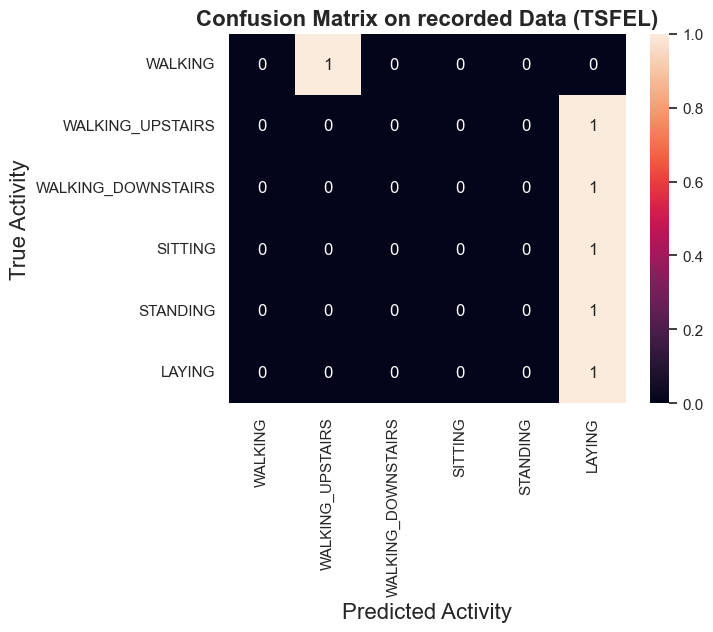

In [64]:
# Use DecisionTreeClassifier with TSFEL features
model = DecisionTreeClassifier(random_state=160)
model.fit(tsfel_data.values, y_train)
y_pred = model.predict(tsfel_recorded_df.values)

# Evaluate and plot confusion matrix
accuracy = accuracy_score(recorded_activities, y_pred)
conf_matrix = confusion_matrix(recorded_activities, y_pred)

print(f"Accuracy on recorded data (using TSFEL): {accuracy * 100}%")

class_labels_list = [key for key, value in sorted(classes.items(), key=lambda item: item[1])]

# Plot the confusion matrix with customized labels
sns.heatmap(conf_matrix, annot=True, xticklabels=class_labels_list, yticklabels=class_labels_list)

# Add labels and title
plt.xlabel("Predicted Activity", fontdict={'fontsize': 16})
plt.ylabel("True Activity", fontdict={'fontsize': 16})
plt.title("Confusion Matrix on recorded Data (TSFEL)", fontdict={'fontsize': 16, 'fontweight': 'bold'})

# Show the plot
plt.show()